[]
主成分の分散説明率
[0.53459577]
55 55
Train score: 0.237
Test score: 0.059
トレーニングデータに対する正解率： 0.26
(38, 1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
[[ 4.48882801e-01  4.99000000e+02]
 [-9.22204149e-01  5.39000000e+02]
 [ 1.19221475e+00  4.52000000e+02]
 [-1.10363483e-01  5.39000000e+02]
 [-1.89463964e-01  4.78000000e+02]
 [-1.81811208e-01  5.03000000e+02]
 [ 1.12224195e+00  5.31000000e+02]
 [ 7.28486682e-02  5.30000000e+02]
 [-1.07848617e+00  4.78000000e+02]
 [ 3.85219662e-01  5.30000000e+02]
 [-2.20589615e-01  5.30000000e+02]
 [ 2.95007127e-01  5.03000000e+02]
 [ 6.06500597e-01  5.26000000e+02]
 [ 1.18501333e+00  4.44000000e+02]
 [ 6.23812036e-01  5.30000000e+02]
 [ 1.49566370e+00  4.14000000e+02]
 [-8.34132970e-01  5.28000000e+02]
 [ 8.13335507e-01  5.36000000e+02]
 [-1.41633392e+00  5.30000000e+02]
 [-2.

ValueError: X has 2 features per sample; expecting 1

<Figure size 1440x720 with 0 Axes>

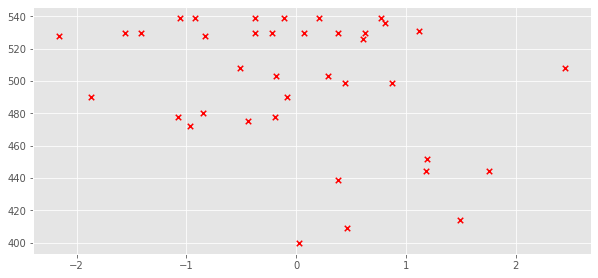

In [367]:
import numpy as np
import pandas as pd
#from sklearn.decomposition import PCA
from pandas import plotting
from sklearn import preprocessing, decomposition
from sklearn.svm import LinearSVC, SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import scipy.stats
import mglearn


df_sunlight = pd.read_csv('sunlight_hours.csv', index_col=0)
df_temp = pd.read_csv('NiigataKishou_temp.csv', index_col = 0)
df_humidity = pd.read_csv('arrange_humidity.csv', index_col = 0)
df_yield = pd.read_csv('niigata_rice_10a.csv', index_col = 0)
#print(df_sunlight['1'])
#df_sunlight.plot()
#df_temp.plot()
#df_humidity.plot()
#df_yield.plot()

#plotting.scatter_matrix(df_sunlight)

sunlight = df_sunlight['6'].values
#print(sunlight)
temp = df_temp['6'].values
humidity = df_humidity['6'].values


#data = np.empty((55,3), float)
data = np.empty([0, 3])
print(data)
for i in range(len(sunlight)):
    temp_array = np.array([sunlight[i], temp[i], humidity[i]])
    #print(temp_array, type(temp_array))
    #data = np.concatenate([data, temp_array], axis = 0)
    data = np.append(data, np.array([temp_array]), axis = 0)
    #print(np.array([sunlight[i], temp[i], humidity[i]]))


#data = [sunlight, temp, humidity]
#data = np.array(data)
#print(data)


rice_yield = np.array(df_yield['Yield/10a(t)'].values)

y_judge = np.empty([0,1])
for j in rice_yield:
    if j >= 490:
        y_judge = np.append(y_judge, 1)
    else:
        y_judge = np.append(y_judge, 0)

y_judge = np.array(y_judge, dtype=int)


#pca = PCA()

pca = decomposition.PCA(n_components=1)
#pca.fit(data)
sc=StandardScaler()
#sc.fit(data)
X=sc.fit_transform(data)
#X = pca.fit_transform(data)


#pca.fit(rice_yield)
#sc.fit(rice_yield)
#R = sc.transform(rice_yield)


#pca = decomposition.PCA(n_components=1)
X_transformed = pca.fit_transform(X)
#R_transformed = pca.fit_transform(R)
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
#print("固有ベクトル")
#print(pca.components_)
#print(pca.singular_values_)




#print(X_transformed)
#rice_yield = scipy.stats.zscore(rice_yield)
print(rice_yield.size, X_transformed.size)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, rice_yield, test_size=0.3, random_state=None )


#print(y_train)


sc = StandardScaler() 
sc.fit(X_train)
#print(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#y_train_std = sc.transform(y_train)



''' SVM '''

#model = SVC(kernel='linear', random_state=None)
model = LinearSVC()
linear_svm = model.fit(X_train_std, y_train)
#model.fit(y_train, X_train_std) 本当はこっちが良いのでは?
predict = model.predict(X_test_std)


#print(X_train_std)
#print(y_train)
#print(X_train.size == y_train.size)
#mglearn.plots.plot_2d_separator(liner_svm, X_train_std)

print('Train score: {:.3f}'.format(model.score(X_train, y_train)))
print('Test score: {:.3f}'.format(model.score(X_test, y_test)))



from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度

pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(20,10))
#plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
#plt.show()




import matplotlib.pyplot as plt

print(X_train.shape)
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(X_train_std, y_train, c='red', marker='x', s=30, label='origin')
#plt.scatter(X, c='blue', marker='x', s=30, label='standard ')

print(model)

X_plot = np.empty([0, 2])

# y_combinedを二次元配列に変換, 転置
y_combined = y_combined.reshape(1, -1).T


#print(y_combined)
for i in range(len(y_combined)):
    bind = np.array([X_combined_std[i][0], y_combined[i][0]])
    X_plot = np.append(X_plot, np.array([bind]), axis = 0)

print(X_plot)

print(y_judge)
mglearn.plots.plot_2d_separator(linear_svm, X_plot)



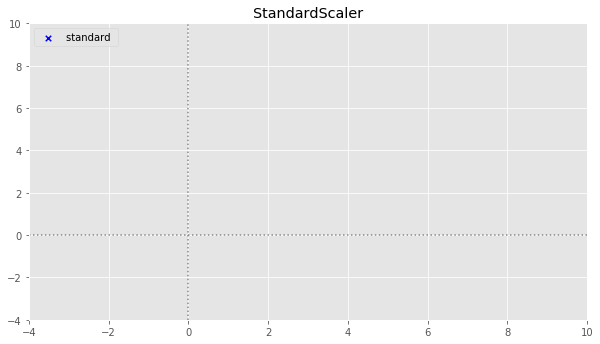

In [311]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 12))
plt.subplot(2,1,1)
plt.title('StandardScaler')
plt.xlim([-4, 10])
plt.ylim([-4, 10])
y_combined = sc.transform(y_combined)
#plt.scatter(data, data, c='red', marker='x', s=30, label='origin')
plt.scatter(X_combined_std, y_combined, c='blue', marker='x', s=30, label='standard ')
plt.legend(loc='upper left')
plt.hlines(0,xmin=-4, xmax=10, colors='#888888', linestyles='dotted')
plt.vlines(0,ymin=-4, ymax=10, colors='#888888', linestyles='dotted')

In [363]:
P, q = mglearn.datasets.make_forge()
print(P, q)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
